# <center>Titanic Survived Prediction</center>
___


### Data Dictionary
| Variable |                 Definition                 |                       Key                      |
|:--------:|:------------------------------------------:|:----------------------------------------------:|
| survival | Survival                                   | 0 = No, 1 = Yes                                |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                |
| parch    | # of parents / children aboard the Titanic |                                                |
| ticket   | Ticket number                              |                                                |
| fare     | Passenger fare                             |                                                |
| cabin    | Cabin number                               |                                                |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

### Variable Notes

pclass: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

# 0 - Libraries

In [36]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# 1 - Import data

In [2]:
df_train = pd.read_csv("Data/train.csv")
df_test = pd.read_csv("Data/test.csv")

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [6]:
df_train['Age'] = df_train['Age'].fillna(-1)
df_test['Age'] = df_test['Age'].fillna(-1)

In [7]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 3 - Exploratory Analysis

## Filter by survivors

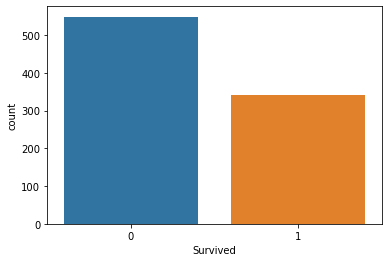

In [36]:
sns.countplot(x='Survived', data = df_train)

In [37]:
df_test["Survived"] = 0
df_test.loc[:, ['PassengerId', 'Survived']].to_csv('Submissions/no_survived.csv', index = False)

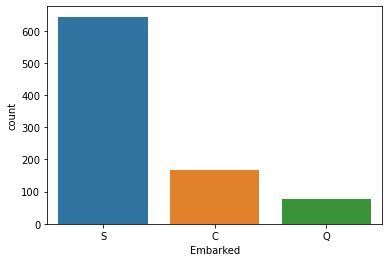

In [38]:
sns.countplot(x='Embarked', data = df_train)

## Filter by sex  == female

c:\users\victo\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


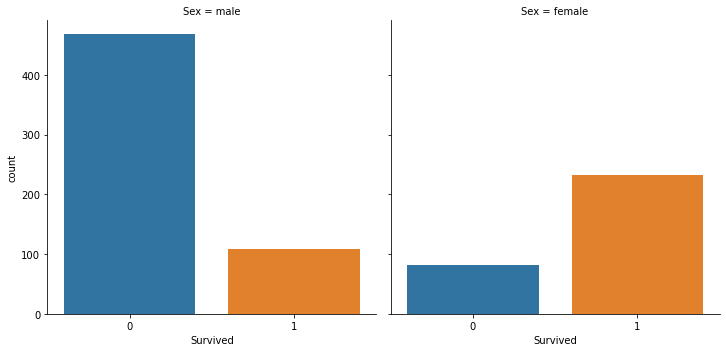

In [39]:
sns.factorplot(x='Survived', col='Sex', kind='count', data = df_train)

In [40]:
df_train.groupby(['Sex']).Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [41]:
df_test['Survived'] = df_test.Sex == 'female'
df_test['Survived'] = df_test.Survived.apply(lambda x: int(x))

df_test.loc[:, ['PassengerId', 'Survived']].to_csv('Submissions/woman_survived.csv', index = False)

## Filter by Pclass == 1

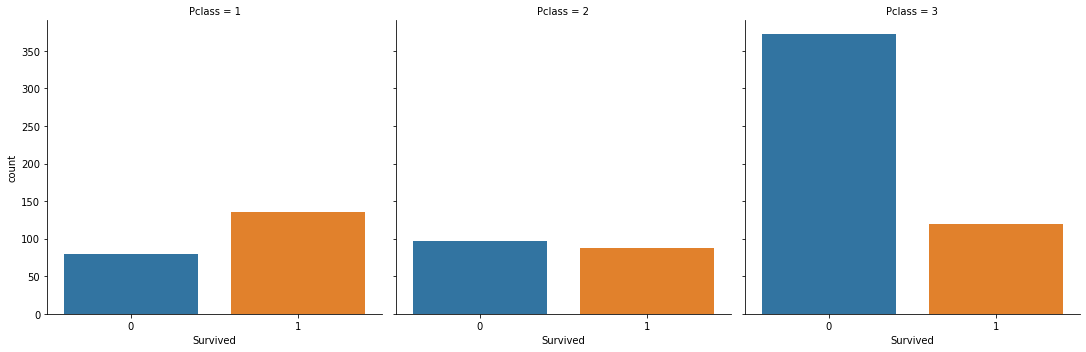

In [42]:
sns.factorplot(x='Survived', col='Pclass', kind='count', data = df_train)

In [43]:
df_test['Survived'] = df_test.Pclass == 1
df_test['Survived'] = df_test.Survived.apply(lambda x: int(x))

df_test.loc[:, ['PassengerId', 'Survived']].to_csv('Submissions/class_survived.csv', index = False)

## Filter by Embarked == C

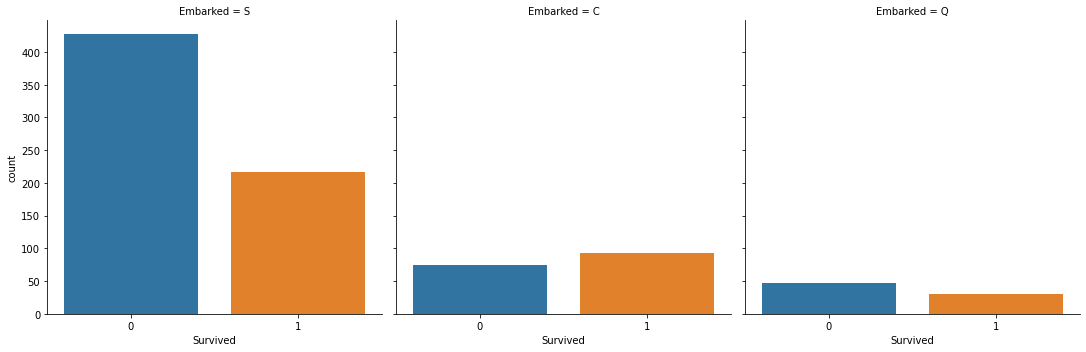

In [44]:
sns.factorplot(x='Survived', col='Embarked', kind='count', data = df_train)

In [45]:
df_test['Survived'] = df_test.Embarked == "C"
df_test['Survived'] = df_test.Survived.apply(lambda x: int(x))

df_test.loc[:, ['PassengerId', 'Survived']].to_csv('Submissions/french_survived.csv', index = False)

## Filter by Sex = female & Pclass = 1

In [12]:
df_women = df_train[df_train.Sex == 'female']
df_men = df_train[df_train.Sex == 'male']
df_women

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


c:\users\victo\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


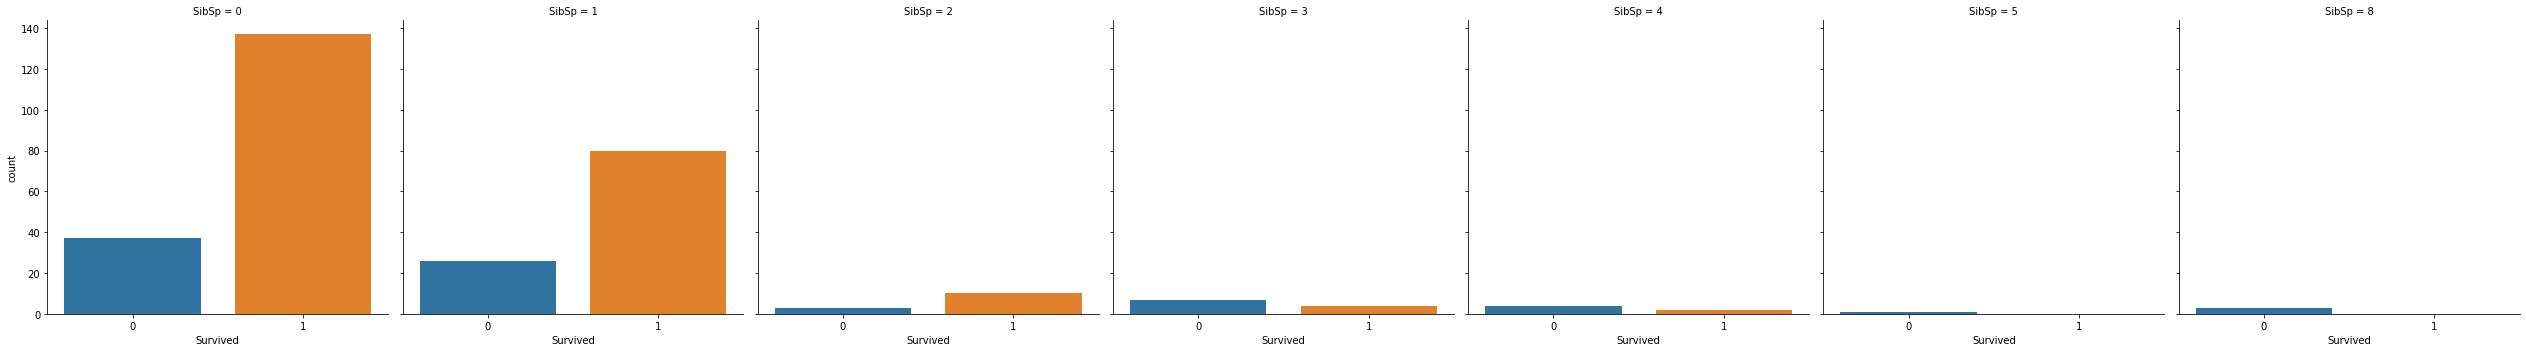

In [13]:
sns.factorplot(x="Survived", col="SibSp", kind="count", data = df_women)

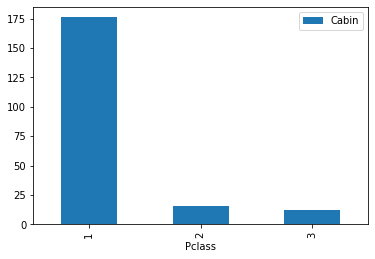

In [32]:
df_train.groupby('Pclass').count()[['Cabin']].plot.bar()

# Feature Engineering

## Title

In [8]:
import string

def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if substring in str(big_string):
            return substring
    return np.nan

In [9]:
title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                    'Don', 'Jonkheer']

df_train['Title'] = df_train['Name'].map(lambda x: substrings_in_string(x, title_list))
df_test['Title'] = df_test['Name'].map(lambda x: substrings_in_string(x, title_list))

In [10]:
#replacing all titles with mr, mrs, miss, master
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

    
df_train['Title'] = df_train.apply(replace_titles, axis=1)
df_test['Title'] = df_test.apply(replace_titles, axis=1)
df_train.drop(columns='Name', inplace=True)
df_test.drop(columns='Name', inplace=True)

df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


## Deck

In [11]:
df_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [12]:
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
df_train['Deck'] = df_train['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))
df_test['Deck'] = df_test['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,NaN
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,NaN
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs,C
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr,NaN


## Famly size

In [13]:
#Creating new family_size column
df_train['Family_Size'] = df_train['SibSp'] + df_train['Parch']
df_test['Family_Size'] = df_test['SibSp'] + df_test['Parch']
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,Family_Size
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,NaN,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,NaN,0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs,C,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr,NaN,0


In [14]:
df_train[['Survived', 'SibSp', 'Parch', 'Family_Size']].corr()

,Survived,SibSp,Parch,Family_Size
Survived,1.000000,-0.035322,0.081629,0.016639
SibSp,-0.035322,1.000000,0.414838,0.890712
Parch,0.081629,0.414838,1.000000,0.783111
Family_Size,0.016639,0.890712,0.783111,1.000000


## Age*Class

In [15]:
df_train['Age*Class'] = df_train['Age'] * df_train['Pclass']
df_test['Age*Class'] = df_test['Age'] * df_test['Pclass']
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,Family_Size,Age*Class
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,NaN,1,66.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C,1,38.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,NaN,0,78.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs,C,1,35.0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr,NaN,0,105.0


In [16]:
df_train[['Survived', 'Age', 'Pclass', 'Age*Class']].corr()

,Survived,Age,Pclass,Age*Class
Survived,1.000000,0.012439,-0.338481,-0.175071
Age,0.012439,1.000000,-0.359728,0.776039
Pclass,-0.338481,-0.359728,1.000000,0.193475
Age*Class,-0.175071,0.776039,0.193475,1.000000


## Fare per person

In [17]:
df_train['Fare_Per_Person'] = df_train['Fare'] / (df_train['Family_Size'] + 1)
df_test['Fare_Per_Person'] = df_test['Fare'] / (df_test['Family_Size'] + 1)
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,Family_Size,Age*Class,Fare_Per_Person
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,NaN,1,66.0,3.62500
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C,1,38.0,35.64165
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,NaN,0,78.0,7.92500
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs,C,1,35.0,26.55000
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr,NaN,0,105.0,8.05000


In [18]:
df_train[['Survived', 'Fare', 'Family_Size', 'Fare_Per_Person']].corr()

,Survived,Fare,Family_Size,Fare_Per_Person
Survived,1.000000,0.257307,0.016639,0.221600
Fare,0.257307,1.000000,0.217138,0.840995
Family_Size,0.016639,0.217138,1.000000,-0.099173
Fare_Per_Person,0.221600,0.840995,-0.099173,1.000000


## Gender (Factorize)

In [19]:
label_train, genders = pd.factorize(df_train['Sex'], sort=True)
label_test, genders = pd.factorize(df_test['Sex'], sort=True)
print(genders)
df_train['Sex'] = label_train
df_test['Sex'] = label_test
df_train.head()

Index(['female', 'male'], dtype='object')


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,Family_Size,Age*Class,Fare_Per_Person
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,NaN,1,66.0,3.62500
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C,1,38.0,35.64165
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,NaN,0,78.0,7.92500
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S,Mrs,C,1,35.0,26.55000
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S,Mr,NaN,0,105.0,8.05000


## Embarked (Factorize)

In [20]:
label_train, ports = pd.factorize(df_train['Embarked'], sort=True)
label_test, ports = pd.factorize(df_test['Embarked'], sort=True)
print(ports)
df_train['Embarked'] = label_train
df_test['Embarked'] = label_test
df_train.head()

Index(['C', 'Q', 'S'], dtype='object')


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,Family_Size,Age*Class,Fare_Per_Person
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,2,Mr,NaN,1,66.0,3.62500
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,0,Mrs,C,1,38.0,35.64165
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,Miss,NaN,0,78.0,7.92500
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,2,Mrs,C,1,35.0,26.55000
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,2,Mr,NaN,0,105.0,8.05000


## Title (Factorize)

In [21]:
label_train, titles = pd.factorize(df_train['Title'], sort=True)
label_test, titles = pd.factorize(df_test['Title'], sort=True)
print(titles)
df_train['Title'] = label_train
df_test['Title'] = label_test
df_train.head()

Index(['Master', 'Miss', 'Mr', 'Mrs'], dtype='object')


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,Family_Size,Age*Class,Fare_Per_Person
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,2,2,NaN,1,66.0,3.62500
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,0,3,C,1,38.0,35.64165
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,1,NaN,0,78.0,7.92500
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,2,3,C,1,35.0,26.55000
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,2,2,NaN,0,105.0,8.05000


## Deck (Factorize)

In [22]:
label_train, decks = pd.factorize(df_train['Deck'], sort=True)
label_test, decks = pd.factorize(df_test['Deck'], sort=True)
print(decks)
df_train['Deck'] = label_train
df_test['Deck'] = label_test
df_train.head()

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype='object')


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,Family_Size,Age*Class,Fare_Per_Person
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,2,2,-1,1,66.0,3.62500
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,0,3,2,1,38.0,35.64165
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,1,-1,0,78.0,7.92500
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,2,3,2,1,35.0,26.55000
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,2,2,-1,0,105.0,8.05000


## Drop columns

In [23]:
df_train.drop(['Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['Ticket', 'Cabin'], axis=1, inplace=True)
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck,Family_Size,Age*Class,Fare_Per_Person
0,1,0,3,1,22.0,1,0,7.2500,2,2,-1,1,66.0,3.62500
1,2,1,1,0,38.0,1,0,71.2833,0,3,2,1,38.0,35.64165
2,3,1,3,0,26.0,0,0,7.9250,2,1,-1,0,78.0,7.92500
3,4,1,1,0,35.0,1,0,53.1000,2,3,2,1,35.0,26.55000
4,5,0,3,1,35.0,0,0,8.0500,2,2,-1,0,105.0,8.05000


In [24]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck,Family_Size,Age*Class,Fare_Per_Person
0,892,3,1,34.5,0,0,7.8292,1,2,-1,0,103.5,7.829200
1,893,3,0,47.0,1,0,7.0000,2,3,-1,1,141.0,3.500000
2,894,2,1,62.0,0,0,9.6875,1,2,-1,0,124.0,9.687500
3,895,3,1,27.0,0,0,8.6625,2,2,-1,0,81.0,8.662500
4,896,3,0,22.0,1,1,12.2875,2,3,-1,2,66.0,4.095833


## PCA Feature Analysis

In [25]:
def feat_select_idx_pca(retained_pcs, n_feats):
    """ Dada uma matriz contendo os primeiros PCs usados, retorna os indices
    dos features mais importantes (com maior coeficiente medio)
    """
    # Toma a media de cada coeficiente entre os diferentes PCs
    mcoefs = np.mean(retained_pcs, axis=0)
    
    return np.argpartition(mcoefs, -n_feats)[-n_feats:]

In [26]:
# Transforma os dados num dataframe do Pandas
titanic_DF = df_train.copy()

# Poe os valores num array numpy
data = titanic_DF.values

# Normaliza os dados
z_scaler = StandardScaler()
z_data = z_scaler.fit_transform(data)

# Ajusta o transformador PCA aos dados (nao e necessario transformar os dados)
pca_trafo = PCA().fit(z_data)

# Calcula o numero de componentes principais que explicam 90% da variancia
cum_exp_var = pca_trafo.explained_variance_ratio_.cumsum()
n_pcs = np.sum(cum_exp_var < .95)
n_pcs_str = str(n_pcs)

# Calcula os indices dos 4 features mais importantes nesses PCs
idx = feat_select_idx_pca(pca_trafo.components_[:n_pcs], 10)
idx.sort()

# Identifica os nomes desses 4 features mais importantes
retained_features = [titanic_DF.columns[i] for i in idx]

print('Features originais:', list(titanic_DF.columns.values))
print('Features mantidos:', retained_features)

Features originais: ['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'Deck', 'Family_Size', 'Age*Class', 'Fare_Per_Person']
Features mantidos: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Family_Size', 'Age*Class', 'Fare_Per_Person']


# Modeling

In [48]:
seed = 2022
features = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Family_Size', 'Age*Class', 'Fare_Per_Person']

X_train = df_train.drop('Survived', axis=1)
#X_train = df_train.loc[:, features]
X_test = df_test.copy()
#X_test = df_test.loc[:, features]
y_train = df_train['Survived']

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(891, 13)
(418, 13)
(891,)


In [49]:
X_test.Fare.fillna(-1, inplace=True)
X_test.Fare_Per_Person.fillna(-1, inplace=True)

In [50]:
# Árvore de decisão
tree_model = DecisionTreeClassifier(random_state=seed, max_depth=4)

tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

print("Acurácia no dataset de treino: {:.3f}".format(tree_model.score(X_train, y_train)))

Acurácia no dataset de treino: 0.853


In [51]:
# Regressão logística
logreg = LogisticRegression(solver='liblinear', C=1)

logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

print("Acurácia no dataset de treino: {:.3f}".format(logreg.score(X_train, y_train)))

Acurácia no dataset de treino: 0.808


In [52]:
# KNN
knn_model = KNeighborsClassifier(n_neighbors=3)

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

print("Acurácia no dataset de treino: {:.3f}".format(knn_model.score(X_train, y_train)))

Acurácia no dataset de treino: 0.815


In [32]:
def export_model(y_pred, filename):
    model_pred = pd.concat([X_test['PassengerId'], pd.Series(y_pred, name='Survived')], axis=1)
    model_pred.to_csv('Submissions/{}.csv'.format(filename), index=False)

In [33]:
export_model(y_pred_tree, 'treemodel_survived')
export_model(y_pred_logreg, 'logregmodel_survived')
export_model(y_pred_knn, 'knnmodel_survived')

### Hyperparameter Tuning

In [39]:
# Plotar importância das features
# Avalia quão importante é cada variável para as decisões que a árvore fornece
# Corresponde a um número entre 0 e 1 para cada feature, onde 0 significa não usada e 1
# "perfeitamente prevê a resposta". A importância das features sempre somam 1
def plot_feature_importances(model):
    # Listando features
    n_features = X_train.shape[1]
    # Gráfico de barras horizontal a partir da importância de cada features
    plt.barh(range(n_features), model.feature_importances_, align='center')
    # Adiciona o ticks, ou traços no eixo Y
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

In [190]:
# DECISION TREE MODEL 3 (com GridSearch)

# Definir os possiveis valores para cada hiperparametro para serem explorados
params = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
          'min_samples_split': [2, 3, 4, 5, 6],
          'min_samples_leaf': [1, 2, 3]}

# Criar objeto com o DecisionTreeClassifier
tree_3 = DecisionTreeClassifier(random_state=seed)

# Criar objeto KFold com StratifiedKFold para validação cruzada
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)

# Criar um objeto de grade de busca com GridSearchCV, a partir dos parâmetros que definimos
grid_search = GridSearchCV(tree_3, param_grid=params, scoring='roc_auc',
                           cv=skf.split(X_train, y_train))

# Treinar o modelo com o grid search
grid_search.fit(X_train, y_train)

# Printar a melhor combinação de hiperparâmetros
print('Melhores hiperparâmetros:')
print(grid_search.best_params_)

Melhores hiperparâmetros:
{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5}


Acurácia no conjunto de treino: 0.852


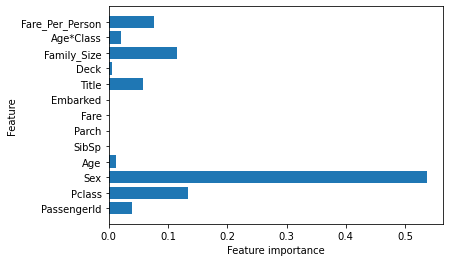

In [189]:
# Gera uma árvore com as melhores combinações de hiperparâmetros
tree_3 = DecisionTreeClassifier(random_state=seed, max_depth=grid_search.best_params_['max_depth'],
                                min_samples_split=grid_search.best_params_['min_samples_split'],
                                min_samples_leaf=grid_search.best_params_['min_samples_leaf'])

# Fita o modelo com o dataset de treino
tree_3.fit(X_train, y_train)

# Usa o modelo para prever o conjunto de validação
y_pred = tree_3.predict(X_test)

# Calcular e printar métricas
print("Acurácia no conjunto de treino: {:.3f}".format(tree_3.score(X_train, y_train)))

# Plotar importância das variáveis
plot_feature_importances(tree_3)

In [41]:
# LOGISTIC REGRESSIONS MODEL 3 (com GridSearch)

# Generate a range with different values for C parameter
grid = {"C": np.arange(1,150,5)}
logreg_cv = GridSearchCV(LogisticRegression(solver='liblinear'), grid, cv=10)
logreg_cv.fit(X_train, y_train)

print("Melhores hiperparâmetros: ", logreg_cv.best_params_)
print("Acurácia:", logreg_cv.best_score_)

Melhores hiperparâmetros:  {'C': 1}
Acurácia: 0.8046816479400748
